<a href="https://www.kaggle.com/code/muqaddaswork/social-network-ads-random-forest?scriptVersionId=208202049" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.sample(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
41,15591915,Female,33,51000,0
393,15635893,Male,60,42000,1
137,15687491,Male,30,107000,1
144,15622833,Female,34,25000,0
266,15721592,Male,40,75000,0
398,15755018,Male,36,33000,0
334,15814553,Male,57,60000,1
349,15721835,Male,38,61000,0
213,15657163,Male,35,58000,0
60,15814004,Male,27,20000,0


In [6]:
df.shape

(400, 5)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.describe(include = 'all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(columns=['User ID'], inplace=True)

In [14]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [15]:
df.corr(numeric_only=True)

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [16]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: xlabel='Gender'>

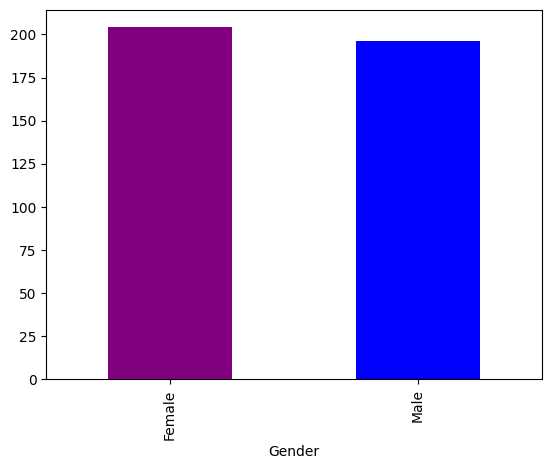

In [17]:
df['Gender'].value_counts().plot(kind = 'bar', color = ['purple', 'blue'])

<Axes: ylabel='count'>

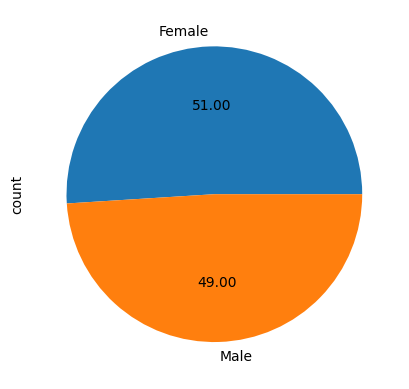

In [18]:
df['Gender'].value_counts().plot(kind='pie', autopct = '%.2f')

In [19]:
df['Age'].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

<Axes: ylabel='Age'>

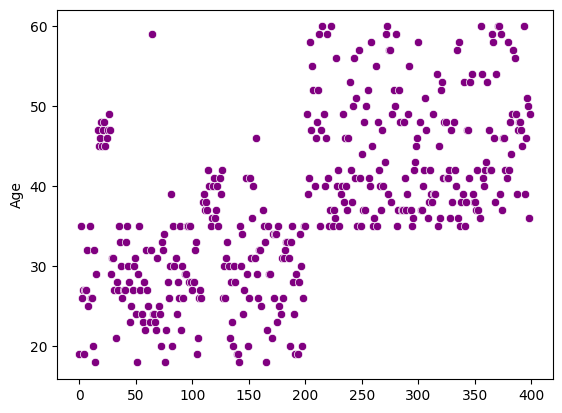

In [20]:
sns.scatterplot(df['Age'], color = 'purple')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

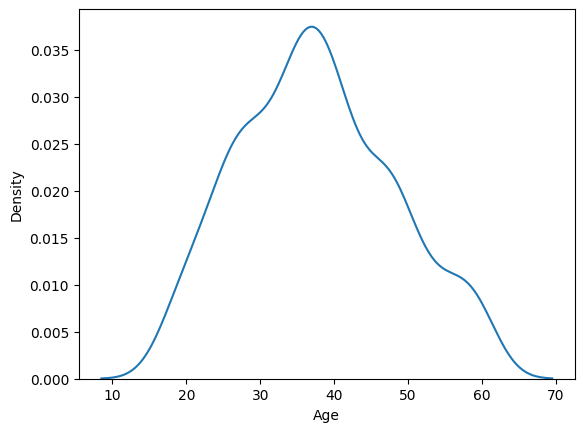

In [21]:
sns.kdeplot(df['Age'])

In [22]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64

<Axes: ylabel='EstimatedSalary'>

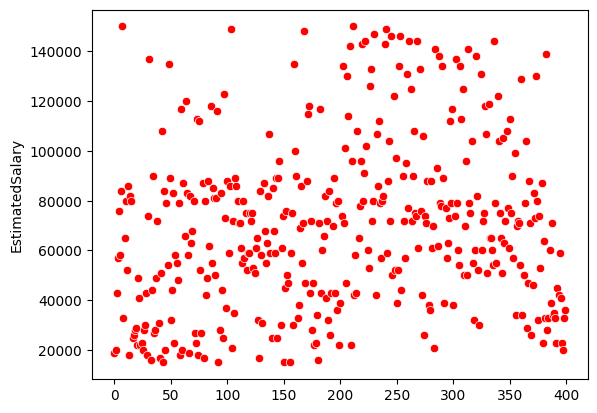

In [23]:
sns.scatterplot(df['EstimatedSalary'], color = 'red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

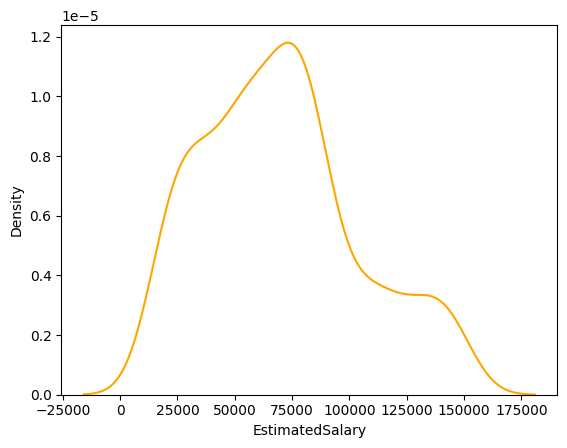

In [24]:
sns.kdeplot(df['EstimatedSalary'], color = 'orange')

In [25]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Purchased'>

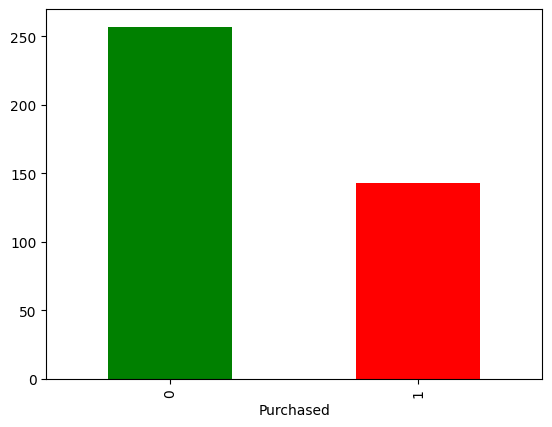

In [26]:
df['Purchased'].value_counts().plot(kind='bar', color=['green', 'red'])

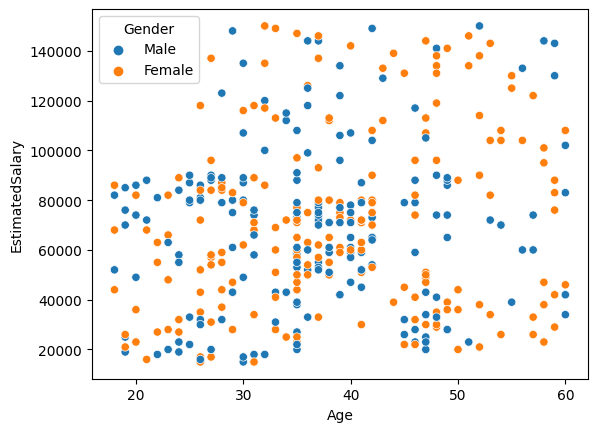

In [27]:
sns.scatterplot(x = df['Age'], y = df['EstimatedSalary'], hue = df['Gender'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

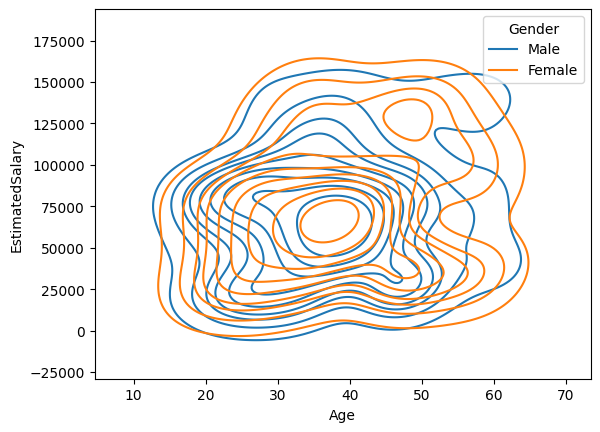

In [28]:
sns.kdeplot(x = df['Age'], y = df['EstimatedSalary'], hue = df['Gender'])
plt.show()

<Axes: ylabel='count'>

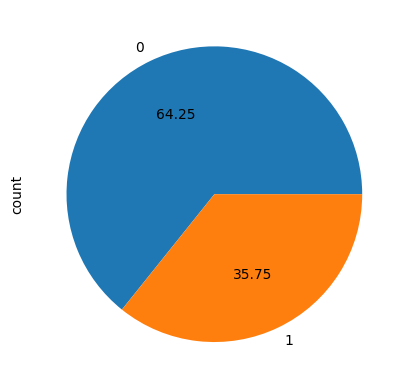

In [29]:
df['Purchased'].value_counts().plot(kind='pie', autopct = '%.2f')

<Axes: xlabel='Gender', ylabel='Age'>

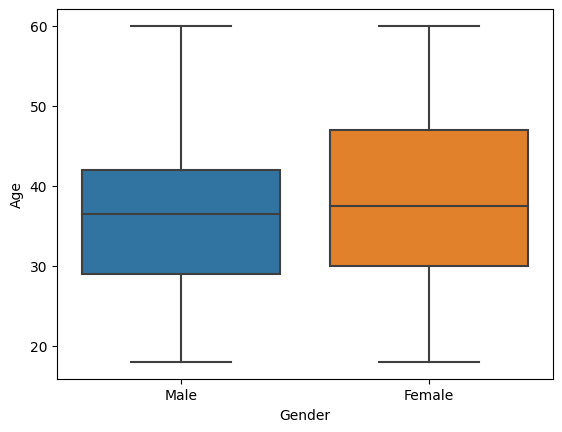

In [30]:
sns.boxplot(x = df['Gender'], y = df['Age'])

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

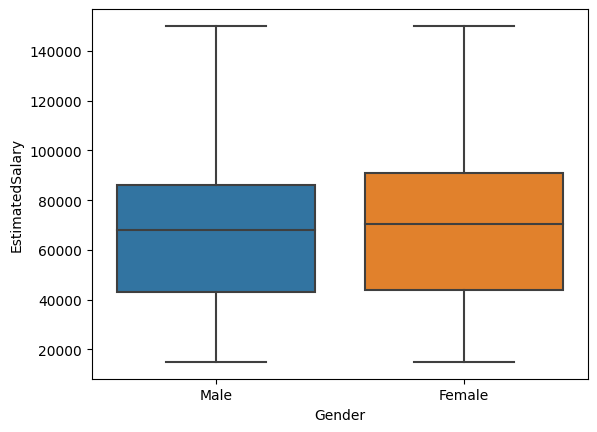

In [31]:
sns.boxplot(x = df['Gender'], y = df['EstimatedSalary'])

In [32]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [33]:
X_train = df.drop(['Purchased'], axis=1)
y_train = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [34]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (320, 3)
X_test Shape: (80, 3)
y_train: (320,)
y_test Shape: (80,)


In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train_scaled = scaler.transform(X_train)

In [38]:
X_test_scaled = scaler.transform(X_test)

In [39]:
scaler.mean_

array([5.0000000e-01, 3.7871875e+01, 7.0281250e+04])

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [41]:
np.round(X_train.describe(), 1)

,Gender,Age,EstimatedSalary
count,320.0,320.0,320.0
mean,0.5,37.9,70281.2
std,0.5,10.2,34430.6
min,0.0,18.0,15000.0
25%,0.0,30.0,43000.0
50%,0.5,37.0,71000.0
75%,1.0,45.0,88000.0
max,1.0,60.0,150000.0


In [42]:
np.round(X_train_scaled.describe(), 1)

,Gender,Age,EstimatedSalary
count,320.0,320.0,320.0
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-1.0,-1.9,-1.6
25%,-1.0,-0.8,-0.8
50%,0.0,-0.1,0.0
75%,1.0,0.7,0.5
max,1.0,2.2,2.3


In [43]:
forest = RandomForestClassifier()
forest_scaled = RandomForestClassifier()

In [44]:
forest.fit(X_train, y_train)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [45]:
y_pred = forest.predict(X_test)
y_pred_scaled = forest.predict(X_test_scaled)

In [46]:
print("y_pred:", y_pred)
print('')
print('---------------------------------------------------------------')
print('')
print("y_pred_scaled:", y_pred_scaled)

y_pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]

---------------------------------------------------------------

y_pred_scaled: [1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 1 0 0]


In [47]:
print("Actual Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Scaled Accuracy Score: ", accuracy_score(y_test, y_pred_scaled))

Actual Accuracy Score:  0.35
Scaled Accuracy Score:  0.9
